# PyData Calgary August 2016

## Interactive Session

# A Little News

# PyCon Canada

* 12-13 November 2016, Toronto
* Call for Proposals open until end of August
* Can submit 10 minuite talks

# PyOhio

Videos Up: [PyOhio 2016 - YouTube](https://www.youtube.com/playlist?list=PL2k6bbM_wgju204mCEyw3bmDH62dp_sLu)

Good beginner talk on logging:

[Python Logging: A meditation on silent failures - YouTube](https://www.youtube.com/watch?v=xtyik4DePVY)

## SciPy 2016 Conference

* July 11-17, Austin TX
* Videos are up now -- see [YouTube](https://www.youtube.com/playlist?list=PLYx7XA2nY5Gf37zYZMw6OqGFRPjB1jCy6)
* [Home | SciPy 2016 Conference](http://scipy2016.scipy.org/ehome/index.php?eventid=146062&tabid=332930&)

### JupyterLab

Presentation: [JupyterLab: Building Blocks for Interactive Computing | SciPy 2016 | Brian Granger - YouTube](https://www.youtube.com/watch?v=Ejh0ftSjk6g&list=PLYx7XA2nY5Gf37zYZMw6OqGFRPjB1jCy6&index=1)

![JupyterLabGif](jupyter-plugins-demo.gif)

* [JupyterLab Tutorial — JupyterLab Tutorial 0.1 documentation](http://jupyterlab-tutorial.readthedocs.io/en/latest/)
* [JupyterLab: the next generation of the Jupyter Notebook](http://blog.jupyter.org/2016/07/14/jupyter-lab-alpha/)
* [jupyter/jupyterlab: JupyterLab computational environment. This is a very early preview, and is not suitable for general usage yet.](https://github.com/jupyter/jupyterlab)

## Altair

* [Keynote: Project Jupyter | SciPy 2016 | Brian Granger - YouTube](https://www.youtube.com/watch?v=v5mrwq7yJc4&index=7&list=PLYx7XA2nY5Gf37zYZMw6OqGFRPjB1jCy6)
* [Altair: Declarative Statistical Visualization for Python // Speaker Deck](https://speakerdeck.com/ellisonbg/altair-declarative-statistical-visualization-for-python)
* [ellisonbg/altair: Declarative statistical visualization library for Python](https://github.com/ellisonbg/altair)

### Demo

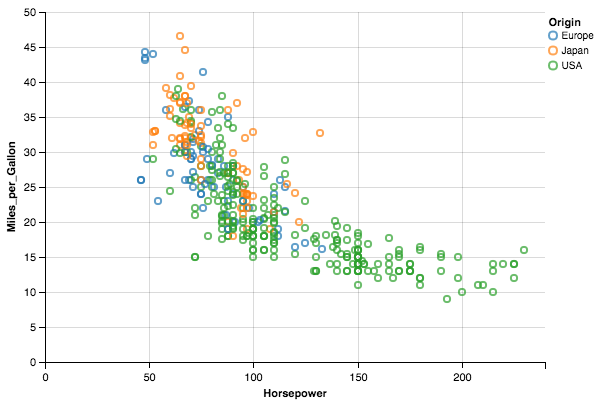

In [1]:
from altair import Chart, load_dataset

# load data as a pandas DataFrame
cars = load_dataset('cars')

Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
)

# Interactive Session

## The Data

[dgrtwo/StackLite: A simple dataset of Stack Overflow questions and tags](https://github.com/dgrtwo/StackLite)

This dataset consists of two different files - questions and tags.
The actual text is stripped out - we have different fields.

In [1]:
import pandas as pd

In [2]:
q = pd.read_csv('questions.csv.gz', parse_dates=['CreationDate', 'ClosedDate', 'DeletionDate'])

In [3]:
q.head()

,Id,CreationDate,ClosedDate,DeletionDate,Score,OwnerUserId,AnswerCount
0,1,2008-07-31 21:26:37,NaT,2011-03-28 00:53:47,1,NaN,0.0
1,4,2008-07-31 21:42:52,NaT,NaT,412,8.0,13.0
2,6,2008-07-31 22:08:08,NaT,NaT,184,9.0,5.0
3,8,2008-07-31 23:33:19,2013-06-03 04:00:25,2015-02-11 08:26:40,42,NaN,8.0
4,9,2008-07-31 23:40:59,NaT,NaT,1291,1.0,57.0


In [4]:
qt = pd.read_csv('question_tags.csv.gz')

In [5]:
qt.head()

,Id,Tag
0,1,data
1,4,c#
2,4,winforms
3,4,type-conversion
4,4,decimal


# The Challenge

We have the data on individual questions and tags... put it together and get some insight out of it.
Get into groups, try to think of a question to ask and try to answer it.
Give a 5 min lighting talk on:

* Your question
* How you approached answering it
* What you found

We will work for 20 minuites - check in with everyone - and then go for another 20 minutes.

**Ask Questions** if you run into problems.

# Check In

## Grouping by Date

In [6]:
%matplotlib inline

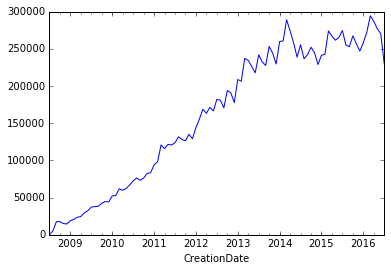

In [7]:
q.groupby(pd.TimeGrouper(key='CreationDate', freq='1M'))['Id'].count().plot()

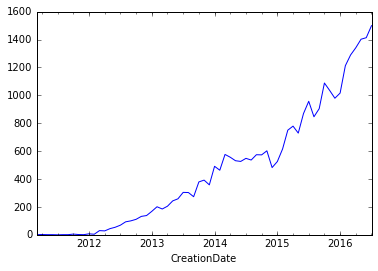

In [8]:
pd.merge(q,
         qt[qt['Tag']=='pandas'],
         on='Id',
         how='inner').groupby(pd.TimeGrouper(key='CreationDate',
                                             freq='1M'))['Id'].count().plot()